# TensorFlow - Neural Network (NLP)

In [1]:
# importing packages
import json
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Sarcasm data

In [2]:
# reading data
with open("./data/sarcasm.json", 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])


### Train/Test Split

In [3]:
# checking number of sentences
len(sentences)

26709

In [4]:
# defining training and testing sets
data_size = 20000
training_sentences = sentences[0:data_size]
testing_sentences = sentences[data_size:]
training_labels = np.array(labels[0:data_size])
testing_labels = np.array(labels[data_size:])

### Hyperparameters

In [5]:
# modifying the hyperparameters for tuning the model
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_token = "<oov>"

### Tokenize

In [6]:
# defining tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

In [7]:
# checking shape
training_padded[0].shape

(32,)

## Create a Linear Model

In [8]:
# creating model
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(training_padded, training_labels)

/Users/msonjap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# checking score
log_reg.score(testing_padded, testing_labels)

0.5743031748397674

In [10]:
# creating model using support vector classification
svm = SVC(kernel='rbf', gamma="auto")
svm.fit(training_padded, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# checking score
svm.score(testing_padded, testing_labels)

0.56759576688031

## Create the Neural Network

In [12]:
# creating a neural network 
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [13]:
# compiling model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the model

In [14]:
# training model
history = model.fit(training_padded, training_labels, 
                    validation_data=(testing_padded, testing_labels), 
                    epochs=5) 

Train on 20000 samples, validate on 6709 samples
Epoch 1/5
20000/20000 [==============================] - 1s 48us/sample - loss: 31.8971 - accuracy: 0.5205 - val_loss: 18.5285 - val_accuracy: 0.4981
Epoch 2/5
20000/20000 [==============================] - 1s 34us/sample - loss: 19.1927 - accuracy: 0.5364 - val_loss: 15.4669 - val_accuracy: 0.5156
Epoch 3/5
20000/20000 [==============================] - 1s 34us/sample - loss: 15.0281 - accuracy: 0.5419 - val_loss: 23.3786 - val_accuracy: 0.5692
Epoch 4/5
20000/20000 [==============================] - 1s 34us/sample - loss: 11.7984 - accuracy: 0.5492 - val_loss: 13.3877 - val_accuracy: 0.5364
Epoch 5/5
20000/20000 [==============================] - 1s 34us/sample - loss: 10.0300 - accuracy: 0.5549 - val_loss: 8.8258 - val_accuracy: 0.5335


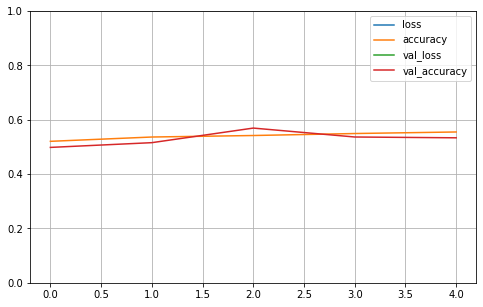

In [15]:
# plotting learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

### Plot the loss

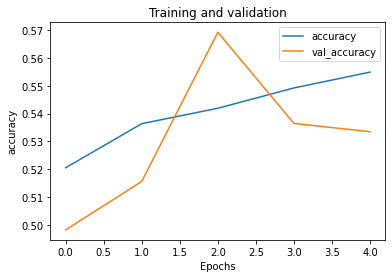

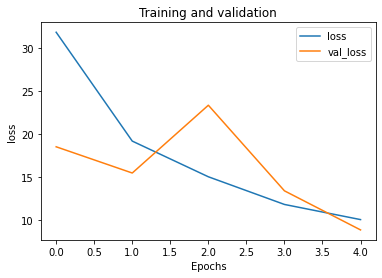

In [16]:
# creating a function to plot 
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")